<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Semanal Nº3 - TS3
#### Tomás Altimare Bercovich

# Resumen
En este tercer trabajo semanal se realizó un anális del desparramo espectral de potencias a partir de tres señales senoidales con diferentes frecuencias para observar, comparar y explicar las diferencias entre las diferentes densidades espectrales de potencia.

# Introdución Teórica
Para realizar el gráfico de la densidad espectral de una señal, es necesario calcular su transformada de fourier. En Python, eso puede realizarse a partir de la función "fft" de la biblioteca de Numpy. Computacionalmente, la "FFT" (Fast Fourier Transform) es una implementación eficiente de la "DFT" (Discrete Fourier Transform), la cual se basa en dividir la DFT en partes lo más pequeñas posibles, explotando las propiedades periodicidad y simetría de la misma. Matemáticamente para una función discreta de N puntos se describe como:
\begin{equation}
X[k] = \sum_{n=0}^{N-1}{x[N].e^{-j2\pi kn/N}} = \sum_{n=0}^{N-1}{x[N].W_N^{kn} \tag{1}
\end{equation}

Por otro lado, para hacer un correcto análisis de las densidades de potencia, es necesario corroborar las potencias de las mismas a partir de calcularlas como:
\begin{equation}
Potencia = \sum_{n=0}^{N-1}{(x^2)/N} \tag{2}
\end{equation}

Con el objetivo de verificar que la energía total de las señales se mantiene constante independientemente del dominio en que se mida, es que usamos la identidad de Parseval, la cual se verifica de la siguiente forma; Siendo:
\begin{equation}
A = \sum_{n=0}^{N-1}{|x^2|} \tag{3}
\end{equation}
\begin{equation}
B = \sum_{n=0}^{N-1}{|X^2|/N} \tag{4}
\end{equation}

Siendo 'x' la señal en sampleos (o tiempo) y 'X' su transformada en el dominio de la frecuencia, se cumple parseval si la diferencia entre A y B es cero (o, en Python, cercana a cero, debido a los números de máquina).

Por último: el método de Zero Padding. El mismo consiste en agregar ceros al final de la señal en el dominio del tiempo antes de calcular su FFT. Al hacerlo, aumentamos la longitud total de la muestra (T) y reducimos el espaciado Δf entre bins en frecuencia (Δf=1/T), lo que aparentemente mejora la “resolución” espectral. En realidad, el zero-padding no introduce nueva información; sólo interpola el espectro discreto para densificar los puntos en frecuencia. El ancho intrínseco de los lóbulos de la FFT sigue determinado por la duración original de la señal (resolución de onda completa 1/T)

# Análisis y Desarrollo

In [1]:
#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

#%%########################
## Definiciones Globales ##
###########################

fs = 1000 # Frecuencia de sampleo
N = 1000 # Cantidad de muestras
ts = 1/fs # Tiempo entre muestras
T_simulacion = N/fs # Tiempo total de simulación
n = np.arange(N) # Las N muestras equiespaciadas

#%%#########################
## Funciones del Programa ##
############################

# Función Seno
def funcion_senoidal(ff, nn, amp = 1, dc = 0, ph = 0, fs = 1000): 
    """
    funcion_senoidal(frec, #_muestras, amplitud, offset, fase, frec_f_wav)
    - Output: tiempo (eje Y), funcion (eje X)
    """    
    # Grilla de sampleo temporal
    n = np.arange(nn)
    tt = n / fs
    
    xx = amp * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    return tt, xx

# Función para imprimir en dB
def dB(X):
    X_shift = fftshift(X) # Armo la FFT centrada
    X_abs = np.abs(X_shift)**2 # Armo el módulo al cuadrado de la FFT (PSD)(la densidad espectral)
    X_max = np.max(X_abs) if np.max(X_abs)>0 else 1 # Calculo el máximo de la funcion para poder trasladar las funciones al mismo eje
    return 20 * np.log10(X_abs / X_max)

def zero_padding(sig, n_zeros = 9):
    Nsig = len(sig)
    padded = np.concatenate([sig, np.zeros(n_zeros * Nsig)]) # Relleno padded con n cantidad de ceros
    return fft(padded) # Armo la densidad espectral con la fft

Se comenzó generando tres senoidales iguales salvo por una pequeña diferencia en sus frecuencias, con valores de:

| Figura | Frecuencia |
| :-: | :-: |
| 1 | (N/4) . Δf |
| 2 | (N/4 + 0.25) . Δf |
| 3 | (N/4 + 0.5) . Δf |

Siendo
\begin{equation}
    \Delta f = N/fs
\end{equation}

Con de estas tres señales y a partir de la función fft.fftshift de numpy, la cual se encarga de centrar el gráfico de densidad espectral en la frecuencia cero, se realizó cuatro gráficos de densidad espectral de potencia (PDS): uno comparando las tres señales y uno por cada señal producida.

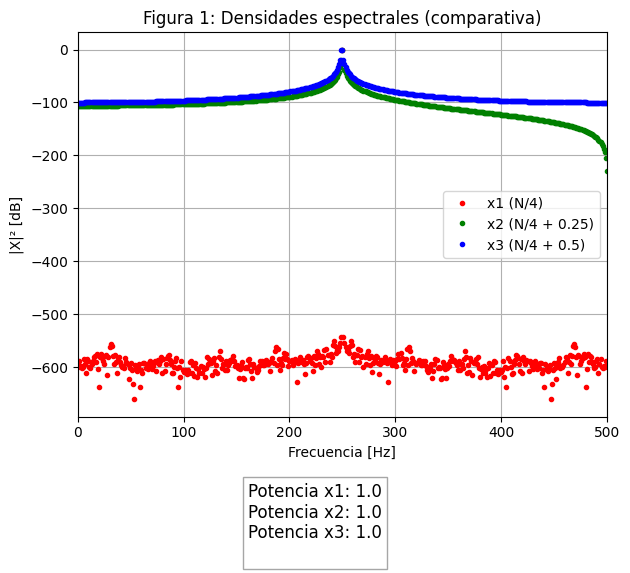

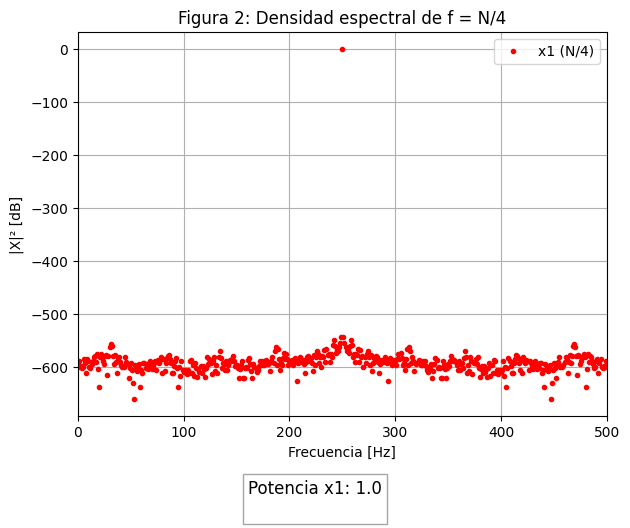

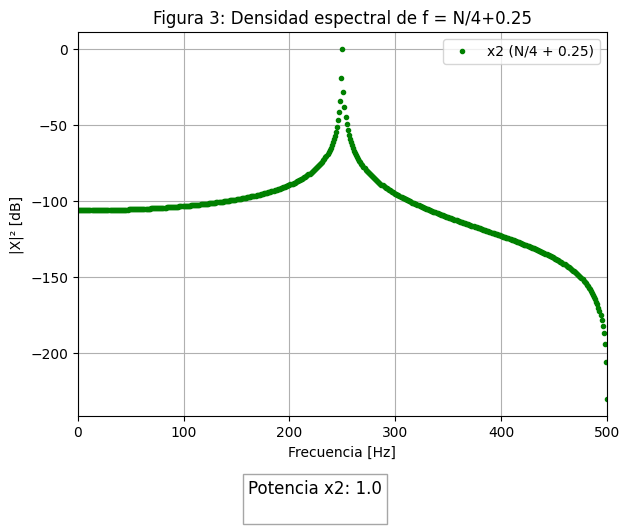

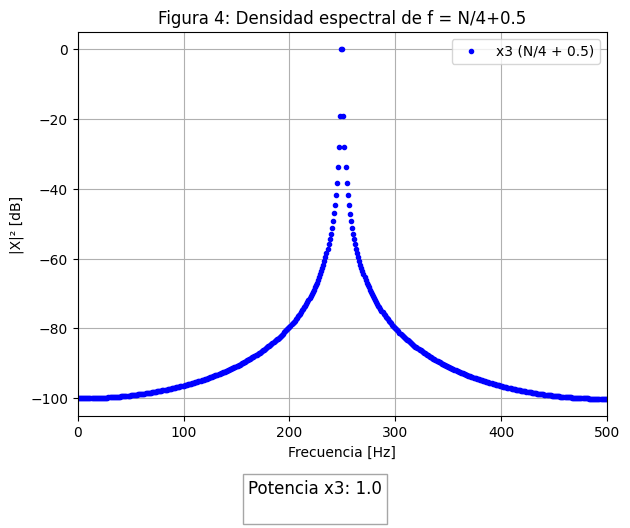

In [2]:
#%%############
## Punto (1) ##
###############
#%% Defino las variables que voy a usar
a0 = np.sqrt(2)
k0 = N/4
df = fs/N 
f1 = k0 * df
f2 = (k0 + 0.25) * df
f3 = (k0 + 0.5) * df
eje_ff = np.arange(N) * df

#%% Armo los senos
tt, x1 = funcion_senoidal(ff = f1, nn = N, amp = a0, fs = fs)
_, x2 = funcion_senoidal(ff = f2, nn = N, amp = a0, fs = fs)
_, x3 = funcion_senoidal(ff = f3, nn = N, amp = a0, fs = fs)

#%% Calculo las potenciias de cada uno
potencia_x1 = np.sum(x1 ** 2) / N
potencia_x2 = np.sum(x2 ** 2) / N
potencia_x3 = np.sum(x3 ** 2) / N

# %% Ploteo
def plotear_fig1_a_fig4():
    plt.figure(1)
    plt.title('Figura 1: Densidades espectrales (comparativa)')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.plot(eje_ff, dB(fft(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.plot(eje_ff, dB(fft(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
        f"Potencia x2: {potencia_x2:3.1f}\n"
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.1, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(2)
    plt.title('Figura 2: Densidad espectral de f = N/4')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(3)
    plt.title('Figura 3: Densidad espectral de f = N/4+0.25')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x2: {potencia_x2:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(4)
    plt.title('Figura 4: Densidad espectral de f = N/4+0.5')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
plotear_fig1_a_fig4()

Como podemos observar en la figura 2, la densidad espectal se encuentra concentrada para una sola frecuencia, mientras que al utilizar frecuencias no discretas (como en las figuras 3 y 4), la densidad espectral (osea, la energía de la señal) queda más "desparramada" y no focalizada en una única frecuencia, moviendo el piso de ruido de las mismas hacia "arriba" (con relación a la figura 2). A éste fenómeno se lo denomina "derrame espectral", y ocurre debido a que las frecuencias de las señales x2 y x3 no pueden completar un numero entero de ciclos dentro del intervalo de muestreo, y debido a que la DFT asume que la señal es periódica: si el registro de N muestras no contiene un entero número de ciclos de la señal, al repetirlo periódicamente aparece una discontinuidad en los bordes del intervalo. Esa discontinuidad introduce armónicos artificiales o componentes de alta frecuencia que no estaban en la señal original, de modo que la energía “se esparce” fuera de la frecuencia principal.

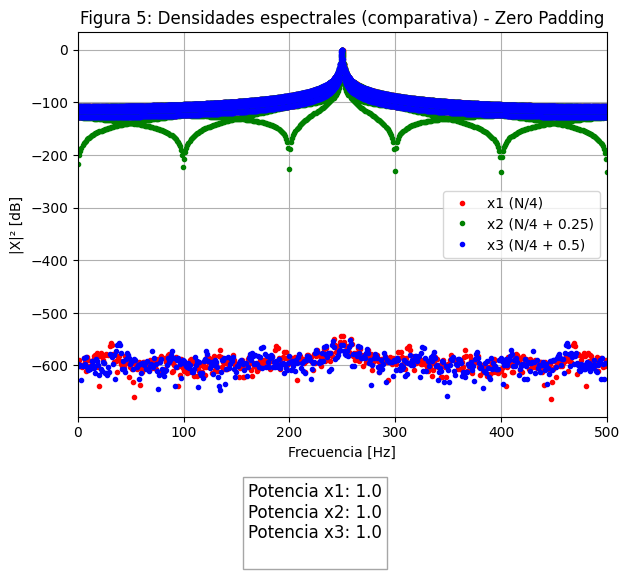

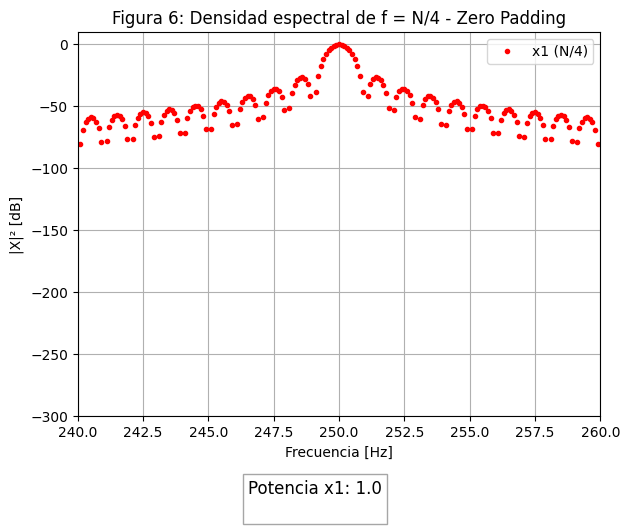

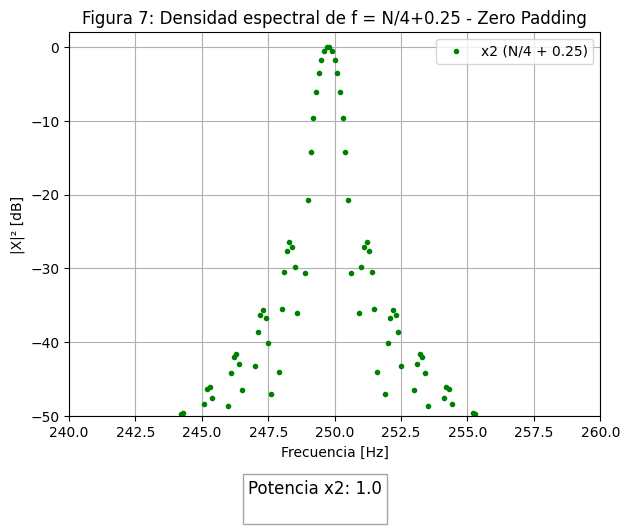

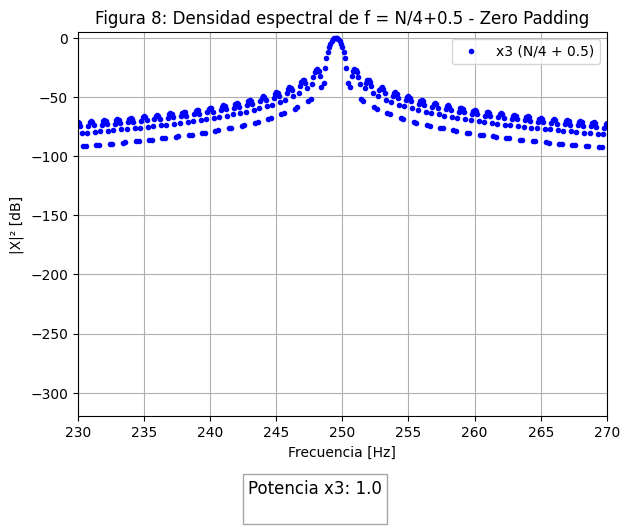

In [3]:
#%%############
## Punto (2) ##
###############
#%% Verifico Parseval para los 3 senos
X1_fft = fft(x1)
X2_fft = fft(x2)
X3_fft = fft(x3)

A1 = np.sum(np.abs(x1)**2)
B1 = np.sum(np.abs(X1_fft)**2)/N
A2 = np.sum(np.abs(x2)**2)
B2 = np.sum(np.abs(X2_fft)**2)/N
A3 = np.sum(np.abs(x3)**2)
B3 = np.sum(np.abs(X3_fft)**2)/N

parseval_x1 = np.abs(A1-B1)
parseval_x2 = np.abs(A2-B2)
parseval_x3 = np.abs(A3-B3)

def verificacion_parseval():
    if (parseval_x1 < 10e-9): # Comparo con un numero pequeño y no cero debido a que Python no suele arrojar ceros (por los numeros de máquina y el redondeo)
        print("\nSe cumple parseval para x1\n")
        
    if (parseval_x2 < 10e-9):
        print("Se cumple parseval para x2\n")
    
    if (parseval_x3 < 10e-9):
        print("Se cumple parseval para x3\n")

#%%############
## Punto (3) ##
###############
N_padding = N + N*9
# eje_ff_padding = np.linspace(0, (N-1)*(df), N_padding)
eje_ff_padding = np.linspace(0, fs, N_padding, endpoint=False)

# Grafico las Densidades de Potencia con Padding
def plotear_fig5_a_fig8():
    plt.figure(5)
    plt.clf()
    plt.title('Figura 5: Densidades espectrales (comparativa) - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.plot(eje_ff_padding, dB(zero_padding(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.plot(eje_ff_padding, dB(zero_padding(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
        f"Potencia x2: {potencia_x2:3.1f}\n"
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.1, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(6)
    plt.clf()
    plt.title('Figura 6: Densidad espectral de f = N/4 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.xlim(240, 260)
    plt.ylim(-300, 10)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(7)
    plt.clf()
    plt.title('Figura 7: Densidad espectral de f = N/4+0.25 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.xlim(240, 260)
    plt.ylim(-50, 2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x2: {potencia_x2:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(8)
    plt.clf()
    plt.title('Figura 8: Densidad espectral de f = N/4+0.5 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(230, 270)
    plt.ylim(-320, 5)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
plotear_fig5_a_fig8()

Como podemos observar en los últimos gráficos, al aplicar zero padding a la señal, mejoramos la interpolación en frecuencia (y por ende, la resolución) de la densidad espectral, logrando ver que producen una sinc. Se puede apreciar ahora como el punto "central" de las densidades está conformada por un lóbulo que abarca un pequeño intervalo de frecuencias, y no una frecuencia unicamente. A su vez, se puede ver como el desparramo también se da en forma de lóbulos secundarios.

# Conclusión
En este trabajo se comprobó experimentalmente el fenómeno del spectral leakage y su relación directa con la alineación entre la frecuencia de la señal y la grilla de la DFT. Cuando f0 coincide exactamente con un bin (k0.Δf) la energía aparece concentrada en un único bin (espectro “puntual”), mientras que pequeñas desintonías (con frecuencias no enteras) producen la envolvente tipo sinc característica y el reparto de energía en varios bins (leakage). La identidad de Parseval se verificó numéricamente, confirmando que la energía en tiempo y en frecuencia coinciden cuando se aplican las normalizaciones correctas; la elección de una amplitud igual a raiz de dos hace que la potencia media del seno muestreada sea aproximadamente 1, como se esperaba teóricamente.

El uso de zero padding (append de ceros) mostró su papel práctico: no elimina el leakage pero sí interpola la DFT, facilitando la localización fina del máximo espectral y la visualización de la envolvente sinc sin añadir información nueva. Para análisis más precisos se recomienda complementar el padding con ventanas (Hann/Hamming) para reducir side-lobes a costa de ensanchar el lóbulo principal, y siempre elegir fs y N considerando Nyquist y la necesidad de muestrear un número entero de períodos cuando se mida potencia o se pruebe ortogonalidad. En conjunto, los resultados confirman la coherencia entre la teoría y las observaciones numéricas y proporcionan pautas prácticas para obtener estimaciones espectrales fiables en aplicaciones de procesamiento de señales.

# Autoevaluación del Desarrollo
Resolví la tarea con seguridad.

Sí, utilicé una IA (chatGPT) para redactar el informe. La interpretación y entendimiento de los gráficos la realicé en clase y con los profes.

# Bilbiografía
- https://numpy.org/doc/2.3/reference/generated/numpy.fft.fftshift.html
- Thomas Holton (2021), "DIGITAL SIGNAL PROCESSING Principles and Applications"
- https://jackschaedler.github.io/circles-sines-signals/dft_leakage.html#:~:text=change%20the%20input%20frequency%20smoothly,zero%20magnitude
- https://www.u-cursos.cl/ingenieria/2011/1/CI72C/1/material_docente/bajar?id_material=380300#:~:text=Para%20lograr%20esta%20mejora%20de,dentro%20del%20cual%20se%20tiene
- https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter

# Anexo
## Código Completo

In [4]:
"""
Created on Wed Aug 20 2025

@author: Tomás Altimare Bercovich

Descripción:
------------

"""

#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

#%%########################
## Definiciones Globales ##
###########################

fs = 1000 # Frecuencia de sampleo
N = 1000 # Cantidad de muestras
ts = 1/fs # Tiempo entre muestras
T_simulacion = N/fs # Tiempo total de simulación
n = np.arange(N) # Las N muestras equiespaciadas

#%%#########################
## Funciones del Programa ##
############################

# Función Seno
def funcion_senoidal(ff, nn, amp = 1, dc = 0, ph = 0, fs = 1000): 
    """
    funcion_senoidal(frec, #_muestras, amplitud, offset, fase, frec_f_wav)
    - Output: tiempo (eje Y), funcion (eje X)
    """    
    # Grilla de sampleo temporal
    n = np.arange(nn)
    tt = n / fs
    
    xx = amp * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    return tt, xx

# Función para imprimir en dB
def dB(X):
    X_shift = fftshift(X) # Armo la FFT centrada
    X_abs = np.abs(X_shift)**2 # Armo el módulo al cuadrado de la FFT (PSD)(la densidad espectral)
    X_max = np.max(X_abs) if np.max(X_abs)>0 else 1 # Calculo el máximo de la funcion para poder trasladar las funciones al mismo eje
    return 20 * np.log10(X_abs / X_max)

# def zero_padding(sig, N = 1000, fs = 1000): 
#     """
#     padding(sig: señal original, N: # muestras, fs: frecuencia de muestreo)
#     """
#     zeroPadding = np.zeros(N*9) # Lleno el vector de ceros
#     zeroPadding[:len(sig)] = sig # Meto la señal dentro del vector
    
#     sig_padding = np.abs(fft(zeroPadding)) # 
    
#     # zero = np.zeros(len(sig)*9)
#     # sig_padding = np.concatenate((sig, zero))
#     # sig_padding = fft(sig_padding)
    
#     return sig_padding

def zero_padding(sig, n_zeros = 9):
    Nsig = len(sig)
    padded = np.concatenate([sig, np.zeros(n_zeros * Nsig)]) # Relleno padded con n cantidad de ceros
    return fft(padded) # Armo la densidad espectral con la fft

#%%############
## Punto (1) ##
###############
#%% Defino las variables que voy a usar
a0 = np.sqrt(2)
k0 = N/4
df = fs/N 
f1 = k0 * df
f2 = (k0 + 0.25) * df
f3 = (k0 + 0.5) * df
eje_ff = np.arange(N) * df

#%% Armo los senos
tt, x1 = funcion_senoidal(ff = f1, nn = N, amp = a0, fs = fs)
_, x2 = funcion_senoidal(ff = f2, nn = N, amp = a0, fs = fs)
_, x3 = funcion_senoidal(ff = f3, nn = N, amp = a0, fs = fs)

#%% Calculo las potenciias de cada uno
potencia_x1 = np.sum(x1 ** 2) / N
potencia_x2 = np.sum(x2 ** 2) / N
potencia_x3 = np.sum(x3 ** 2) / N

# %% Ploteo
def plotear_fig1_a_fig4():
    plt.figure(1)
    plt.title('Figura 1: Densidades espectrales (comparativa)')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.plot(eje_ff, dB(fft(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.plot(eje_ff, dB(fft(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
        f"Potencia x2: {potencia_x2:3.1f}\n"
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.1, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(2)
    plt.title('Figura 2: Densidad espectral de f = N/4')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(3)
    plt.title('Figura 3: Densidad espectral de f = N/4+0.25')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x2: {potencia_x2:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(4)
    plt.title('Figura 4: Densidad espectral de f = N/4+0.5')
    plt.grid(True)
    plt.plot(eje_ff, dB(fft(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
#%%############
## Punto (2) ##
###############
#%% Verifico Parseval para los 3 senos
X1_fft = fft(x1)
X2_fft = fft(x2)
X3_fft = fft(x3)

A1 = np.sum(np.abs(x1)**2)
B1 = np.sum(np.abs(X1_fft)**2)/N
A2 = np.sum(np.abs(x2)**2)
B2 = np.sum(np.abs(X2_fft)**2)/N
A3 = np.sum(np.abs(x3)**2)
B3 = np.sum(np.abs(X3_fft)**2)/N

parseval_x1 = np.abs(A1-B1)
parseval_x2 = np.abs(A2-B2)
parseval_x3 = np.abs(A3-B3)

def verificacion_parseval():
    if (parseval_x1 < 10e-9): # Comparo con un numero pequeño y no cero debido a que Python no suele arrojar ceros (por los numeros de máquina y el redondeo)
        print("\nSe cumple parseval para x1\n")
        
    if (parseval_x2 < 10e-9):
        print("Se cumple parseval para x2\n")
    
    if (parseval_x3 < 10e-9):
        print("Se cumple parseval para x3\n")

#%%############
## Punto (3) ##
###############
N_padding = N + N*9
# eje_ff_padding = np.linspace(0, (N-1)*(df), N_padding)
eje_ff_padding = np.linspace(0, fs, N_padding, endpoint=False)

# Grafico las Densidades de Potencia con Padding
def plotear_fig5_a_fig8():
    plt.figure(5)
    plt.clf()
    plt.title('Figura 5: Densidades espectrales (comparativa) - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.plot(eje_ff_padding, dB(zero_padding(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.plot(eje_ff_padding, dB(zero_padding(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(0, N/2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
        f"Potencia x2: {potencia_x2:3.1f}\n"
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.1, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(6)
    plt.clf()
    plt.title('Figura 6: Densidad espectral de f = N/4 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x1)), '.', color = 'red', label = 'x1 (N/4)')
    plt.xlim(240, 260)
    plt.ylim(-300, 10)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x1: {potencia_x1:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(7)
    plt.clf()
    plt.title('Figura 7: Densidad espectral de f = N/4+0.25 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x2)), '.', color = 'green', label = 'x2 (N/4 + 0.25)')
    plt.xlim(240, 260)
    plt.ylim(-50, 2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x2: {potencia_x2:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(8)
    plt.clf()
    plt.title('Figura 8: Densidad espectral de f = N/4+0.5 - Zero Padding')
    plt.grid(True)
    plt.plot(eje_ff_padding, dB(zero_padding(x3)), '.', color = 'blue', label = 'x3 (N/4 + 0.5)')
    plt.xlim(230, 270)
    plt.ylim(-320, 5)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("|X|\u00b2 [dB]")
    plt.legend()
    # Añado una leyenda con los datos sobre la señal:
    info_fig = (
        f"Potencia x3: {potencia_x3:3.1f}\n"
    )
    plt.figtext(0.5, -0.05, info_fig, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
